In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = df.drop(['koi_disposition'], axis=1)

y = df['koi_disposition'].values.reshape(-1,1)

In [6]:
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [7]:
y

array([['CONFIRMED'],
       ['FALSE POSITIVE'],
       ['FALSE POSITIVE'],
       ...,
       ['CANDIDATE'],
       ['FALSE POSITIVE'],
       ['FALSE POSITIVE']], dtype=object)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
X = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']

In [9]:
#create the train test and split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data
from sklearn.preprocessing import StandardScaler

#fit the training_data into the scaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [12]:
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {logistic_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8899485027655922
Testing Data Score: 0.8850114416475973


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import joblib

logistic_model_1 = LogisticRegression(solver='newton-cg', multi_class='auto')

param_grid = {
    'C': np.logspace(0, 4, 10),
    'penalty': ['l2']
}
grid_logistic = GridSearchCV(logistic_model_1, param_grid, cv=5, verbose=0)

In [14]:
grid_logistic.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l2']})

In [15]:
print(grid_logistic.best_params_)
print(grid_logistic.best_score_)

{'C': 3593.813663804626, 'penalty': 'l2'}
0.8897556014816


In [16]:
grid_logistic.score(X_train, y_train)

0.49036810986076673

In [17]:
grid_logistic.score(X_test, y_test)

0.4685354691075515

In [18]:
#make predictions

predict = grid_logistic.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

                precision    recall  f1-score   support

     CANDIDATE       0.80      0.72      0.76       411
     CONFIRMED       0.78      0.84      0.81       484
FALSE POSITIVE       0.98      0.99      0.99       853

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.88      0.89      0.88      1748



# Save the Model

In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'LogisticRegression.sav'
joblib.dump(logistic_model_1, filename)

['LogisticRegression.sav']

# Use Support Vector Machine

In [20]:
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

# Train Support Vector Machine

In [21]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")


Training Data Score: 0.8922372687392714
Testing Data Score: 0.8884439359267735


# SVM Hyperparameter Tuning

In [22]:
#Hypertune parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid_svm = GridSearchCV(svm_model, param_grid, verbose=3)



In [23]:
#train the model with GridSearchCV

grid_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.900 total time=   0.3s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.888 total time=   0.3s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.898 total time=   0.3s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.878 total time=   0.3s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.882 total time=   0.4s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.900 total time=   0.3s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.888 total time=   0.3s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.898 total time=   0.3s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.878 total time=   0.3s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.882 total time=   0.4s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.900 total time=   0.3s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [24]:
print(grid_svm.best_params_)
print(grid_svm.best_score_)

{'C': 5, 'gamma': 0.0001}
0.889754146078781


In [25]:
grid_svm.score(X_train_scaled, y_train)

0.8931909212283045

In [26]:
grid_svm.score(X_test_scaled, y_test)

0.8878718535469108

In [27]:
#predictions

predict= grid_svm.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

                precision    recall  f1-score   support

     CANDIDATE       0.81      0.71      0.76       411
     CONFIRMED       0.78      0.84      0.81       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.89      1748



# save svm model

In [28]:
import joblib
filename = 'Support_Vector_Machine.sav'
joblib.dump(svm_model, filename)

['Support_Vector_Machine.sav']

# Try RandomForest Classifier

# Train RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf_model = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9033180778032036


In [30]:
sorted(zip(clf_model.feature_importances_, y), reverse=True)

[(0.10679104936463797, 'FALSE POSITIVE'),
 (0.10068058509160106, 'CONFIRMED'),
 (0.06670616099726455, 'FALSE POSITIVE'),
 (0.054520791716888145, 'CONFIRMED'),
 (0.05075046523405153, 'CONFIRMED'),
 (0.03522330240457256, 'CONFIRMED'),
 (0.034557922024233065, 'CONFIRMED'),
 (0.03405206295089999, 'CONFIRMED'),
 (0.03333319066491026, 'CONFIRMED'),
 (0.0321063802158135, 'CANDIDATE'),
 (0.028716592286395965, 'FALSE POSITIVE'),
 (0.02754693150170348, 'CONFIRMED'),
 (0.023107310940822166, 'CONFIRMED'),
 (0.023079017388109958, 'CONFIRMED'),
 (0.02240992025410495, 'FALSE POSITIVE'),
 (0.022019006163826894, 'FALSE POSITIVE'),
 (0.021731907002698624, 'CONFIRMED'),
 (0.019306733642876977, 'CONFIRMED'),
 (0.019161134838190118, 'CONFIRMED'),
 (0.0191159064915393, 'FALSE POSITIVE'),
 (0.01727917195540506, 'CONFIRMED'),
 (0.016089951611169013, 'FALSE POSITIVE'),
 (0.015364649700427216, 'FALSE POSITIVE'),
 (0.013645986049839371, 'CONFIRMED'),
 (0.013300711229246434, 'FALSE POSITIVE'),
 (0.012951390286472

# RandomForestClassifier Hyperparameter Tuning

In [31]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid_clf = GridSearchCV(clf_model, param_grid, verbose=3)

In [32]:
grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...max_depth=125, n_estimators=250;, score=0.901 total time=   2.6s
[CV 2/5] END ...max_depth=125, n_estimators=250;, score=0.902 total time=   2.5s
[CV 3/5] END ...max_depth=125, n_estimators=250;, score=0.883 total time=   2.6s
[CV 4/5] END ...max_depth=125, n_estimators=250;, score=0.889 total time=   2.6s
[CV 5/5] END ...max_depth=125, n_estimators=250;, score=0.883 total time=   2.6s
[CV 1/5] END ...max_depth=125, n_estimators=300;, score=0.904 total time=   3.2s
[CV 2/5] END ...max_depth=125, n_estimators=300;, score=0.904 total time=   3.2s
[CV 3/5] END ...max_depth=125, n_estimators=300;, score=0.886 total time=   3.2s
[CV 4/5] END ...max_depth=125, n_estimators=300;, score=0.885 total time=   3.0s
[CV 5/5] END ...max_depth=125, n_estimators=300;, score=0.884 total time=   3.2s
[CV 1/5] END ...max_depth=125, n_estimators=350;, score=0.903 total time=   3.8s
[CV 2/5] END ...max_depth=125, n_estimators=350;,

GridSearchCV(estimator=RandomForestClassifier(n_estimators=500, random_state=1),
             param_grid={'max_depth': [125, 150, 175],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [33]:
print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'max_depth': 125, 'n_estimators': 300}
0.8924249921772098


In [34]:
grid_clf.score(X_train_scaled, y_train)

1.0

In [35]:
grid_clf.score(X_test_scaled, y_test)

0.902745995423341

In [36]:
predict = grid_clf.predict(X_test_scaled)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.76      0.80       411
     CONFIRMED       0.84      0.86      0.85       484
FALSE POSITIVE       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.88      1748
  weighted avg       0.90      0.90      0.90      1748



# Save RandomForest Classifier

In [38]:
import joblib
filename = 'RandomForest Classifier.sav'
joblib.dump(clf_model, filename)

['RandomForest Classifier.sav']

# KNN Classifier

In [39]:
# next try KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.910/0.831
k: 5, Train/Test Score: 0.889/0.832
k: 7, Train/Test Score: 0.880/0.830
k: 9, Train/Test Score: 0.874/0.830
k: 11, Train/Test Score: 0.869/0.831
k: 13, Train/Test Score: 0.865/0.826
k: 15, Train/Test Score: 0.861/0.824
k: 17, Train/Test Score: 0.860/0.824
k: 19, Train/Test Score: 0.856/0.830
k: 21, Train/Test Score: 0.856/0.834
k: 23, Train/Test Score: 0.854/0.831
k: 25, Train/Test Score: 0.848/0.832
k: 27, Train/Test Score: 0.844/0.832
k: 29, Train/Test Score: 0.845/0.824


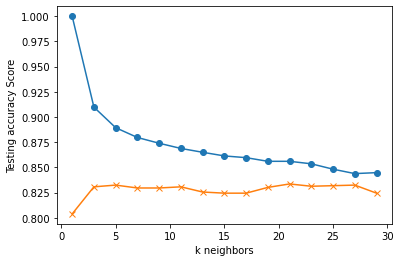

In [40]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
print('k=27 Test Acc: %.3f' % knn.score(X_test, y_test))

k=27 Test Acc: 0.640


In [42]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test, y_test))

k=17 Test Acc: 0.634


In [43]:
import joblib
filename = 'KNN Classifier.sav'
joblib.dump(knn, filename)

['KNN Classifier.sav']